In [199]:
import json
import numpy as np
from skimage.draw import polygon
from skimage.morphology import skeletonize, skeletonize_3d, medial_axis
from matplotlib import pyplot as plt
from itertools import combinations

## Methods definition

In [200]:
def extract_name(feature):
    if 'name' in feature['properties']:
        return feature['properties']['name']
    elif 'wikipedia' in feature['properties']:
        return feature['properties']['wikipedia']
    else:
        return None
    

In [201]:
def extract_coordinates(feature):
    x_coordinates = []
    y_coordinates = []
    for point in feature['geometry']['coordinates'][0]:
        x_coordinates.append(point[0])
        y_coordinates.append(point[1])
                
    return x_coordinates, y_coordinates


In [202]:
def binary_image(im_size, x_coordinates, y_coordinates):
    x_coordinates = np.array(x_coordinates)
    y_coordinates = np.array(y_coordinates)

    x_coordinates -= min(x_coordinates)
    y_coordinates -= min(y_coordinates)


    x_max = max(x_coordinates)
    y_max = max(y_coordinates)

    if x_max >= y_max:
        ratio = im_size/x_max

    else:
        ratio = im_size/y_max

    x_coordinates *= ratio
    y_coordinates *= ratio

    img = np.zeros((im_size, im_size), dtype=np.uint8)

    x, y = polygon(x_coordinates, y_coordinates)
    img[x, y] = 1
    
    return img

## Data loading

In [203]:
im_size = 300


In [204]:
with open('geojson/lacs_chablais.geojson') as f:
    lacs_chablais = json.load(f)

### TODO: Manage multipolygon

In [205]:
lakes = []
for feature in lacs_chablais['features']:
    if feature['geometry']['type'] == 'Polygon':
        name = extract_name(feature)
        bin_image = binary_image(im_size, *extract_coordinates(feature))
        lakes.append((name, bin_image))

    
    

In [218]:
def logical_distance(im1, im2):
    im_xor = np.logical_xor(im1,im2)
    #plt.imshow(im_xor)
    #plt.show()
    return np.sum(im_xor)
    

In [219]:
im1 = lakes[0][1]
im2 = lakes[1][1]

total_sum = logical_distance(im1, im2)

In [220]:
total_sum

51161

In [221]:
distances = []
for lake1, lake2 in combinations(lakes,2):
    distances.append((logical_distance(lake1[1], lake2[1]), lake1, lake2))
    

In [222]:
distances = sorted(distances, key=lambda d: d[0])

In [230]:
distances[0]

(3981, ('Lac de Montriond', array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ..., 
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)), (None,
  array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ..., 
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)))

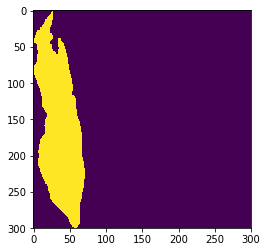

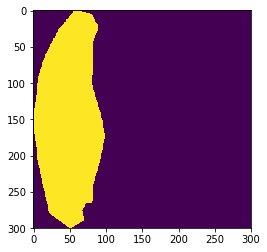

In [255]:
distance = distances[16]

plt.imshow(distance[1][1])
plt.show()
plt.imshow(distance[2][1])
plt.show()

Lac Léman


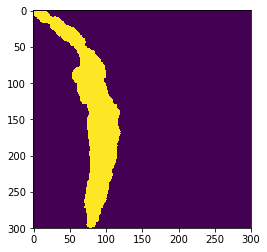

Lac de Sauvabelin


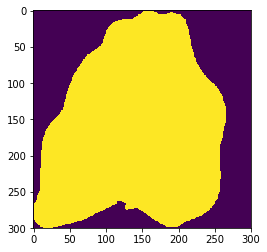

fr:Lac de Divonne


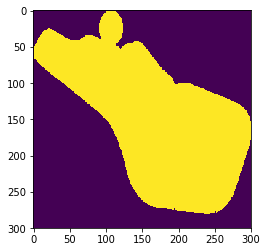

Lac de Bellefontaine


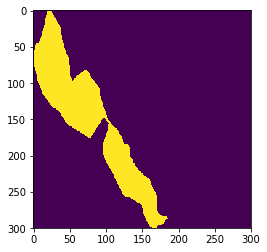

Lac Tanay


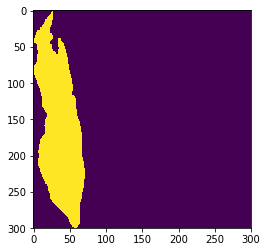

None


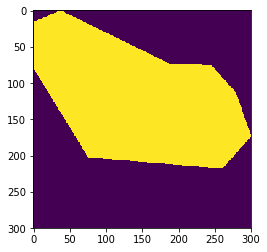

Lac de Tavaneuse


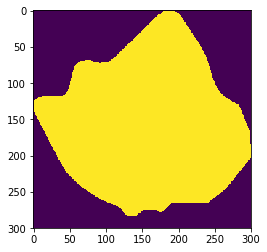

Lac des Mortes


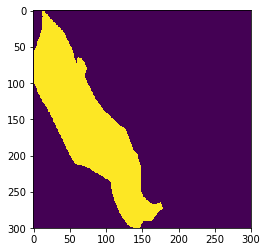

Lac des Rousses


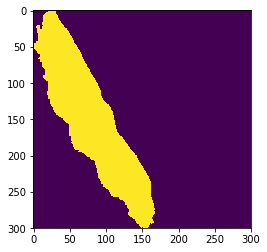

Lac d'Arvouin


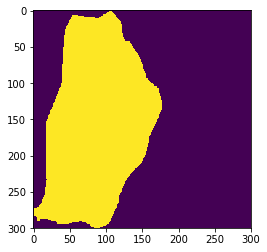

Lac de Roy


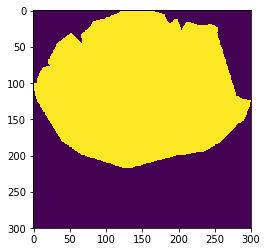

Lac de Montriond


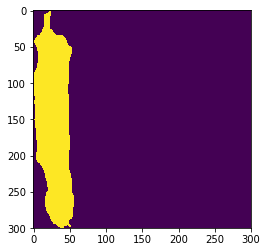

Lac des Plagnes


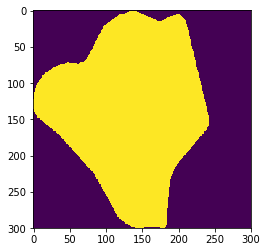

Lac Bleu


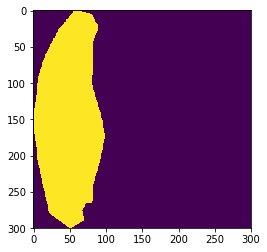

None


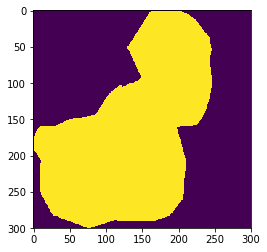

Lac d'Anton


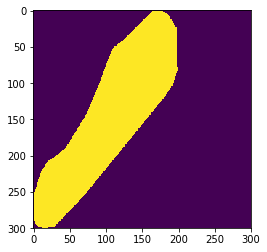

Lac de Darbon


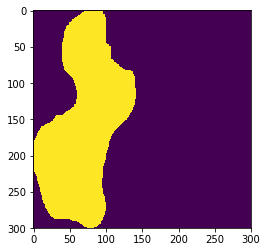

None


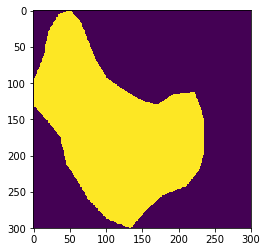

None


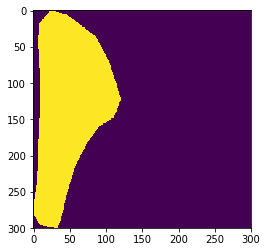

None


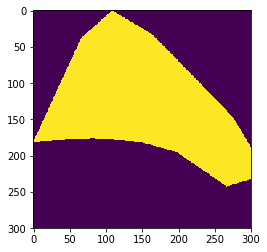

None


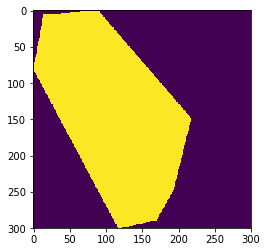

None


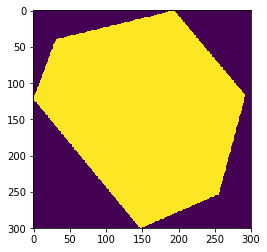

None


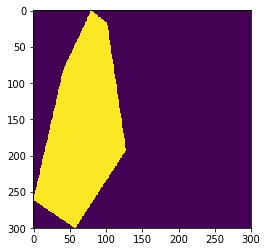

Lac du Mont Bénand


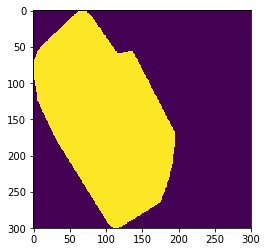

Lac de Blantsin


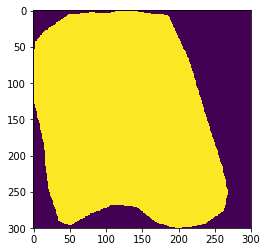

None


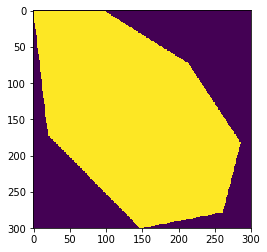

None


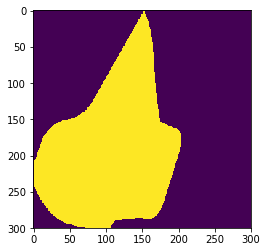

Lac de Fontanabran


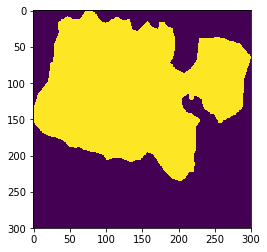

None


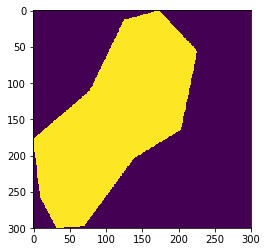

None


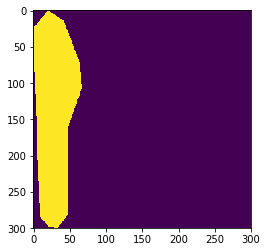

None


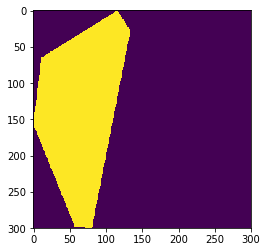

None


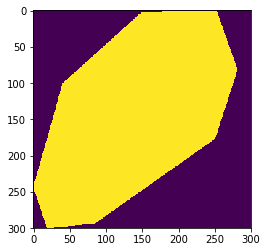

None


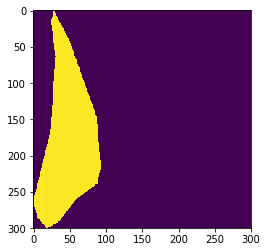

Lac de Sageroux


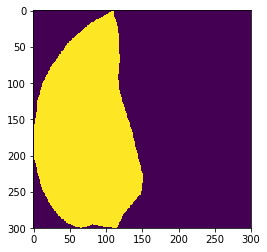

Lac de Bret


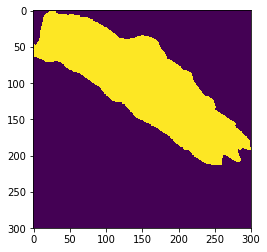

None


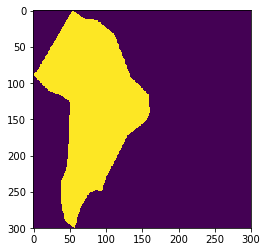

None


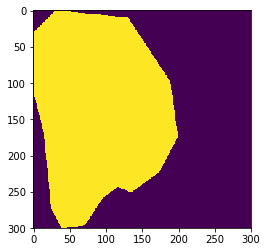

In [174]:
for name, bin_im in lakes:
    plt.imshow(bin_im)
    print(name)
    plt.show()
    

In [127]:
with open('geojson/lac_des_rousses.geojson') as f:
    data = json.load(f)

## Binary image creation

In [129]:
lac_des_rousses_bin = binary_image(im_size, x_coordinates, y_coordinates)

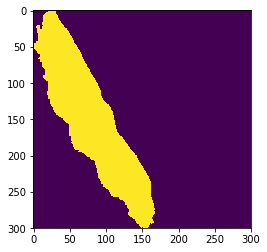

In [130]:
plt.imshow(lac_des_rousses_bin)
plt.show()

### Skeleton vs Medial Axi vs Skeleton 3D

In [116]:
skeleton = skeletonize(img)

In [117]:
skeleton

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

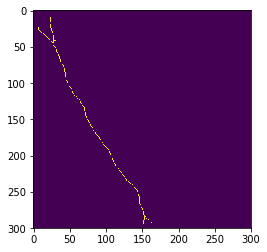

In [118]:
plt.imshow(skeleton)
plt.show()

In [119]:
skel, distance = medial_axis(img, return_distance=True)

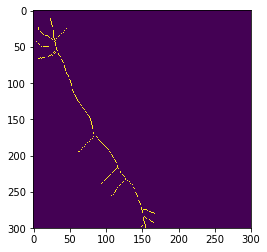

In [120]:
plt.imshow(skel)
plt.show()

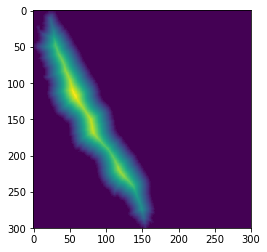

In [121]:
plt.imshow(distance)
plt.show()

In [122]:
skeleton_3d = skeletonize_3d(img)

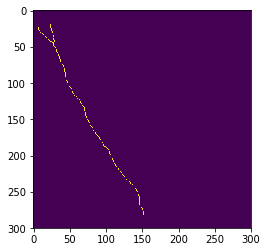

In [123]:
plt.imshow(skeleton_3d)
plt.show()